In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from IPython.display import Image
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

Using TensorFlow backend.


# Data preprocessing

In [2]:
X_train = np.array(train.drop('label', axis=1)).reshape(-1,28,28,1)
X_test = np.array(test).reshape(-1,28,28,1)
y_train = np.array(pd.get_dummies(train['label']))

In [3]:
X_train=X_train/255
X_test=X_test/255

# Model training

In [4]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model=Sequential()
model.add(Conv2D(16, kernel_size=4, input_shape=[28,28,1], activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(3200, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        8224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 64)          256       
__________

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.10)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 270s 7ms/step - loss: 0.2936 - acc: 0.9507 - val_loss: 0.0845 - val_acc: 0.9776
Epoch 2/10
37800/37800 [==============================] - 271s 7ms/step - loss: 0.1105 - acc: 0.9746 - val_loss: 0.0935 - val_acc: 0.9740
Epoch 3/10
37800/37800 [==============================] - 276s 7ms/step - loss: 0.0963 - acc: 0.9765 - val_loss: 0.0879 - val_acc: 0.9800
Epoch 4/10
37800/37800 [==============================] - 274s 7ms/step - loss: 0.0918 - acc: 0.9789 - val_loss: 0.1228 - val_acc: 0.9748
Epoch 5/10
37800/37800 [==============================] - 273s 7ms/step - loss: 0.0783 - acc: 0.9821 - val_loss: 0.0611 - val_acc: 0.9850
Epoch 6/10
18080/37800 [=============>................] - ETA: 2:17 - loss: 0.0612 - acc: 0.9847

## Saving results on csv file

In [6]:
pd.DataFrame({'ImageId': np.arange(1,len(test)+1), 'label': np.argmax(model.predict(X_test), axis=1)}).to_csv('sample_submission.csv', index=False)

# Visualizing the results

In [7]:
y_pred = model.predict(X_train)

In [8]:
ypred = np.argmax(y_pred, axis=1)
ytrain = np.argmax(y_train, axis=1)

In [9]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

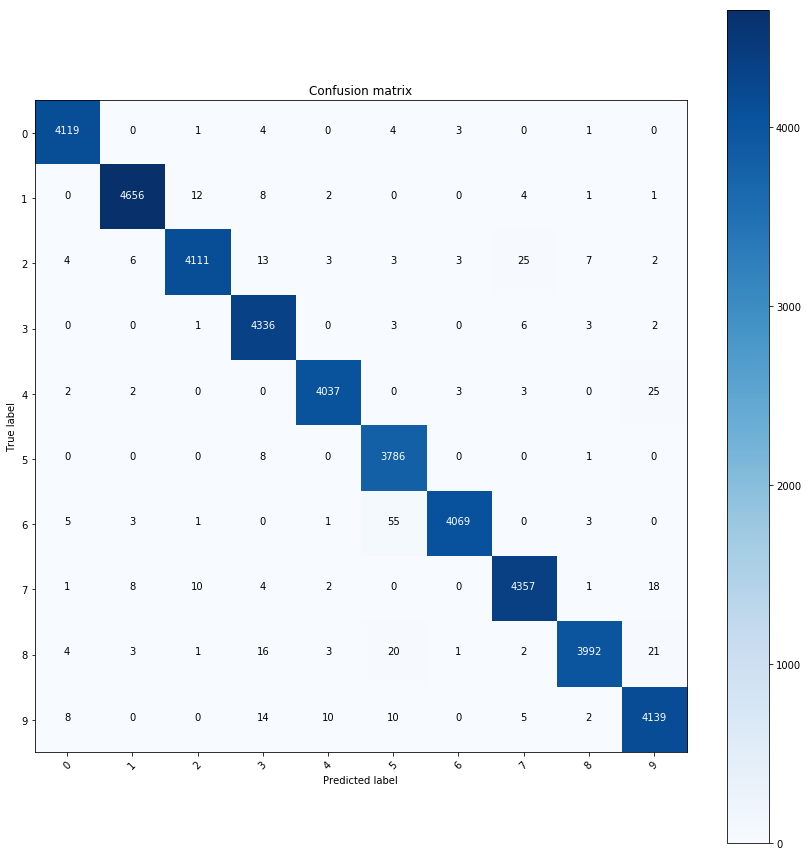

In [10]:
cnf_matrix = confusion_matrix(ytrain, ypred)
np.set_printoptions(precision=2)
class_names = np.arange(0,10)
plt.figure(figsize=[12,12])
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

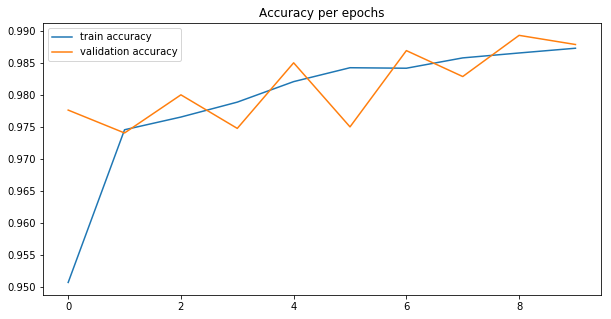

In [11]:
plt.figure(figsize=[10,5])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy per epochs")
plt.legend(['train accuracy', 'validation accuracy']);

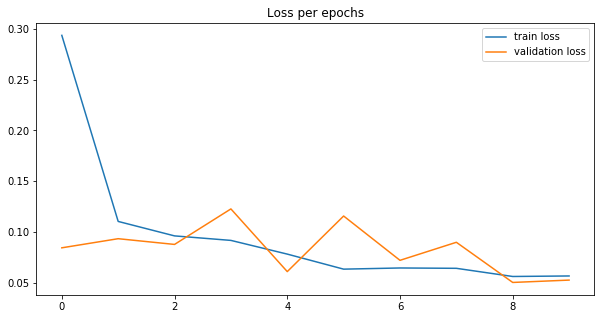

In [12]:
plt.figure(figsize=[10,5])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss per epochs")
plt.legend(['train loss', 'validation loss']);

In [13]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Model architecture

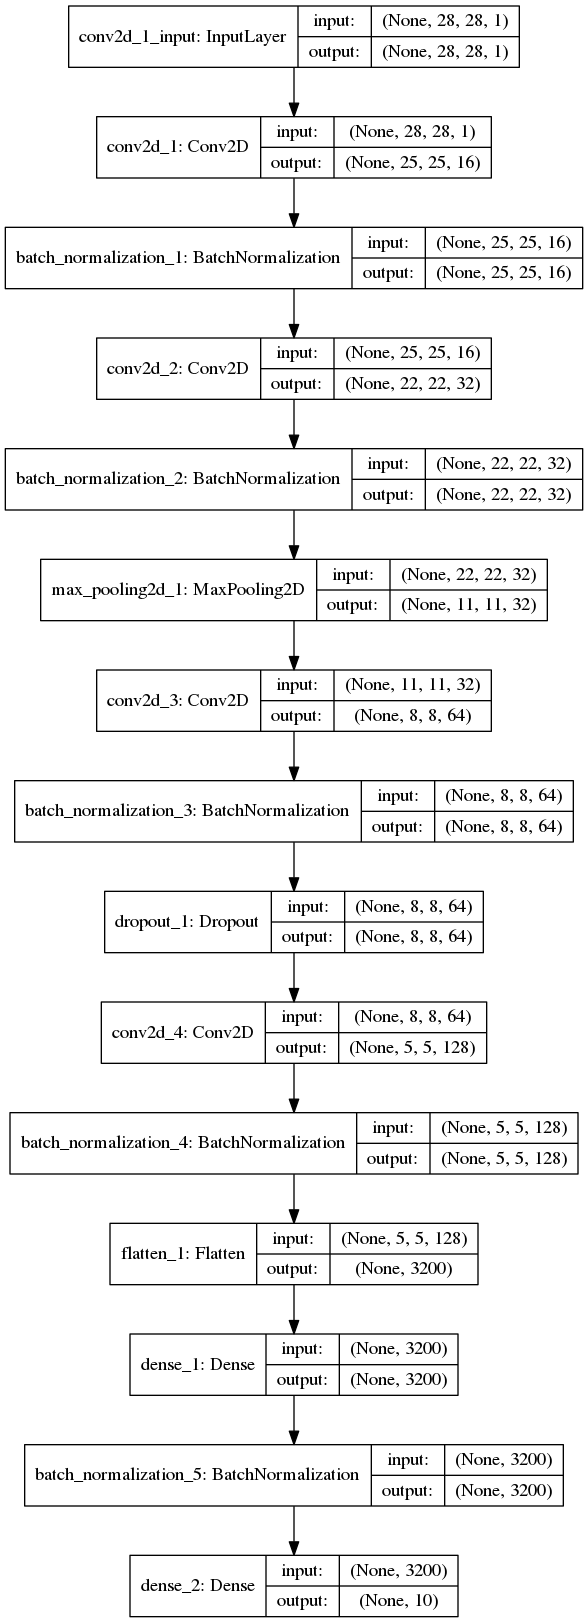

In [14]:
Image('model.png')